In [25]:
import os
import pandas as pd
import numpy as np
import datetime

from IPython import get_ipython

from fbprophet import Prophet

from sklearn.metrics import mean_absolute_error as mae

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns
sns.set()

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio
init_notebook_mode(connected=True)

In [72]:
path = './data/time_series_20200323.csv'
df = pd.read_csv(path)
df['date'] = pd.to_datetime(df['date'])
df.head(10)

,date,country,region,lat,long,confirmed,deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0,0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0,0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0,0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0,0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0,0
5,2020-01-27,Afghanistan,NaN,33.0,65.0,0,0
6,2020-01-28,Afghanistan,NaN,33.0,65.0,0,0
7,2020-01-29,Afghanistan,NaN,33.0,65.0,0,0
8,2020-01-30,Afghanistan,NaN,33.0,65.0,0,0
9,2020-01-31,Afghanistan,NaN,33.0,65.0,0,0


In [76]:
df_poland = df[df['country']=='Poland']

print(df_poland.size)
df_poland = df_poland[df_poland['date'] > pd.to_datetime('2020-03-01')]
print(df_poland.size)

427
147


In [98]:
cut_days = 6
max_date = df_poland['date'].max()
end_date = max_date + datetime.timedelta(days=-cut_days)

train = df_poland[df_poland['date'] < end_date]
test = df_poland[df_poland['date'] >= end_date]

print(df_poland.size)
print(train.size)
print(test.size)

147
98
49


In [99]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train.date, y=train.confirmed,
                    mode='lines+markers',
                    name='train'))

fig.add_trace(go.Scatter(x=test.date, y=test.confirmed,
                    mode='lines+markers',
                    name='test'))
 
plot(fig,filename='plots/pl_confirmed_to_train')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\offline\offline.py:526: UserWarning:

Your filename `plots/pl_confirmed_to_train` didn't end with .html. Adding .html to the end of your file.



'plots/pl_confirmed_to_train.html'

In [100]:
fb_df = train[['date', 'confirmed']].copy()
fb_df.columns = ['ds', 'y']

fb_df.head()

,ds,y
11203,2020-03-02,0
11204,2020-03-03,0
11205,2020-03-04,1
11206,2020-03-05,1
11207,2020-03-06,5


In [101]:
m = Prophet(weekly_seasonality=False)
m.fit(fb_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


In [102]:
future = m.make_future_dataframe(periods=len(test), freq='W', include_history=False)
future.head()

,ds
0,2020-03-22
1,2020-03-29
2,2020-04-05
3,2020-04-12
4,2020-04-19


In [103]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-22,143.728594,121.163517,166.565667,143.728588,143.728600,0.0,0.0,0.0,0.0,0.0,0.0,143.728594
1,2020-03-29,202.277566,179.493977,225.151320,202.277547,202.277584,0.0,0.0,0.0,0.0,0.0,0.0,202.277566
2,2020-04-05,260.826538,239.122725,282.453934,260.826505,260.826572,0.0,0.0,0.0,0.0,0.0,0.0,260.826538
3,2020-04-12,319.375510,296.196614,342.016394,319.375458,319.375562,0.0,0.0,0.0,0.0,0.0,0.0,319.375510
4,2020-04-19,377.924481,354.292640,399.781841,377.924410,377.924553,0.0,0.0,0.0,0.0,0.0,0.0,377.924481


In [105]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train.date, y=train.confirmed,
                mode='lines+markers',
                name='train'))
                        

fig.add_trace(go.Scatter(x=test.date, y=test.confirmed,
                mode='lines+markers',
                name='test'))
                
fig.add_trace(go.Scatter(x=test.date, y=forecast.yhat,
                mode='lines+markers',
                name='forecast'))

plot(fig,filename='plots/pl_confirmed_to_predict')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\offline\offline.py:526: UserWarning:

Your filename `plots/pl_confirmed_to_predict` didn't end with .html. Adding .html to the end of your file.



'plots/pl_confirmed_to_predict.html'

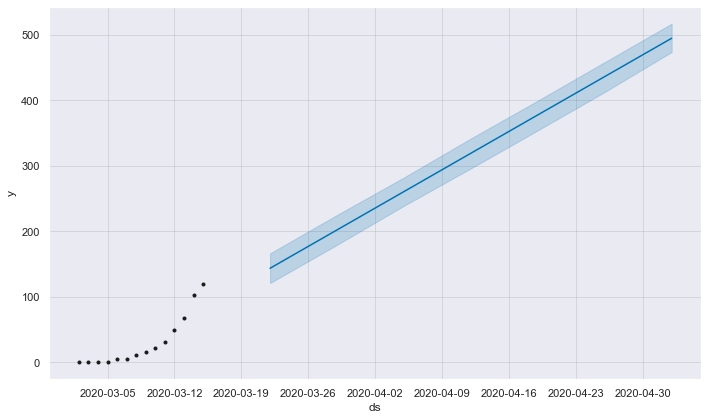

In [106]:
ś

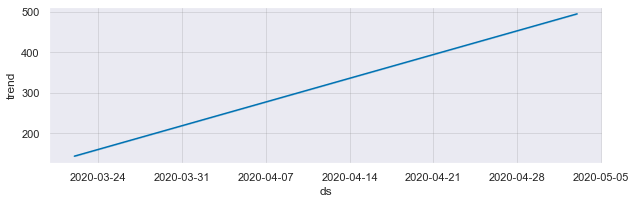

NameError: name 'plot_plotly' is not defined